<a href="https://colab.research.google.com/github/francescakaganzi/MachineLearning/blob/main/Clustering_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Libraries and Datasets

1.1 Import libraries and packages

In [9]:
import os
import io
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling
from sklearn.preprocessing import StandardScaler

# principal component analysis
from sklearn.decomposition import PCA

# kmeans clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# hierachial clustering
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

# geo data
import plotly.express as px

In [5]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


1.2 Import Data

In [6]:
# Load data
country_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/Country-data.csv')
dict_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/data-dictionary.csv')

# 2. Data Description and Distribution

2.1 Data Description

In [7]:
dict_data.head()

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...


In [8]:
# view of the first 5 rows
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# how many columns and rows in dataframe
country_data.shape

(167, 10)

In [ ]:
# brief description of the data set
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
# check for null values
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
# check for duplicates
country_data.duplicated().sum()

0

In [ ]:
# description of the dataset (standard statistical measures)

country_data.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


2.2 Data Distribution

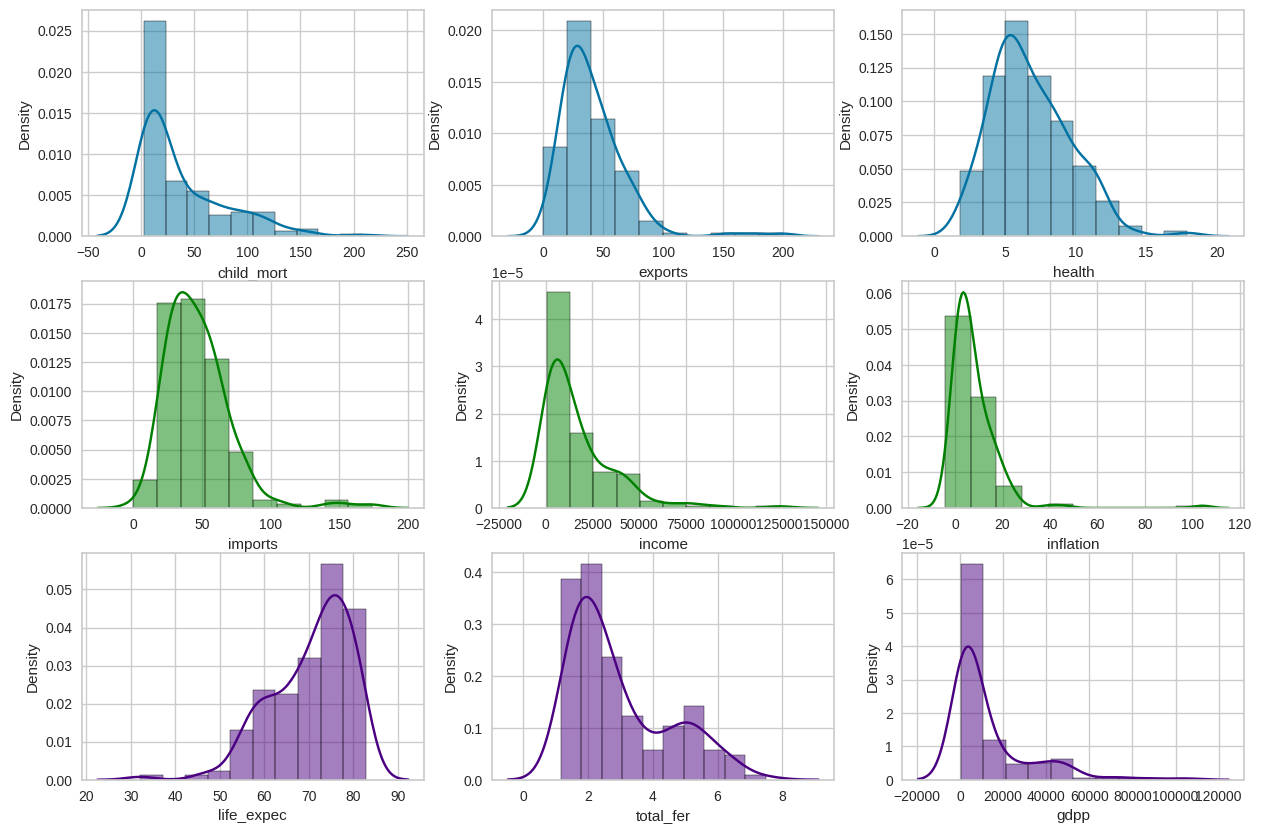

In [ ]:
f, ax = plt.subplots(3,3,figsize=(15,10))
a1 = sns.histplot(country_data["child_mort"], bins=10, ax=ax[0][0], kde=True, stat="density", kde_kws=dict(cut=3))
a2 = sns.histplot(country_data["exports"], bins=10, ax=ax[0][1], kde=True, stat="density", kde_kws=dict(cut=3))
a3 = sns.histplot(country_data["health"], bins=10, ax=ax[0][2], kde=True, stat="density", kde_kws=dict(cut=3))
a4 = sns.histplot(country_data["imports"], bins=10, ax=ax[1][0], kde=True, stat="density", kde_kws=dict(cut=3), color='green')
a5 = sns.histplot(country_data["income"], bins=10, ax=ax[1][1], kde=True, stat="density", kde_kws=dict(cut=3), color='green')
a6 = sns.histplot(country_data["inflation"], bins=10, ax=ax[1][2], kde=True, stat="density", kde_kws=dict(cut=3), color='green')
a7 = sns.histplot(country_data["life_expec"], bins=10, ax=ax[2][0], kde=True, stat="density", kde_kws=dict(cut=3), color='indigo')
a8 = sns.histplot(country_data["total_fer"], bins=10, ax=ax[2][1], kde=True, stat="density", kde_kws=dict(cut=3), color='indigo')
a9 = sns.histplot(country_data["gdpp"], bins=10, ax=ax[2][2], kde=True, stat="density", kde_kws=dict(cut=3), color='indigo')

<Axes: >

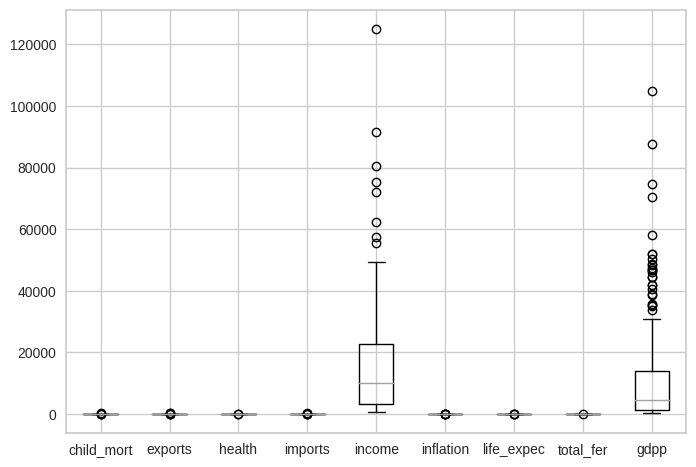

In [ ]:
# Using dataframe data: plot and identify any outliers

country_data.boxplot()

2.3 Correlation

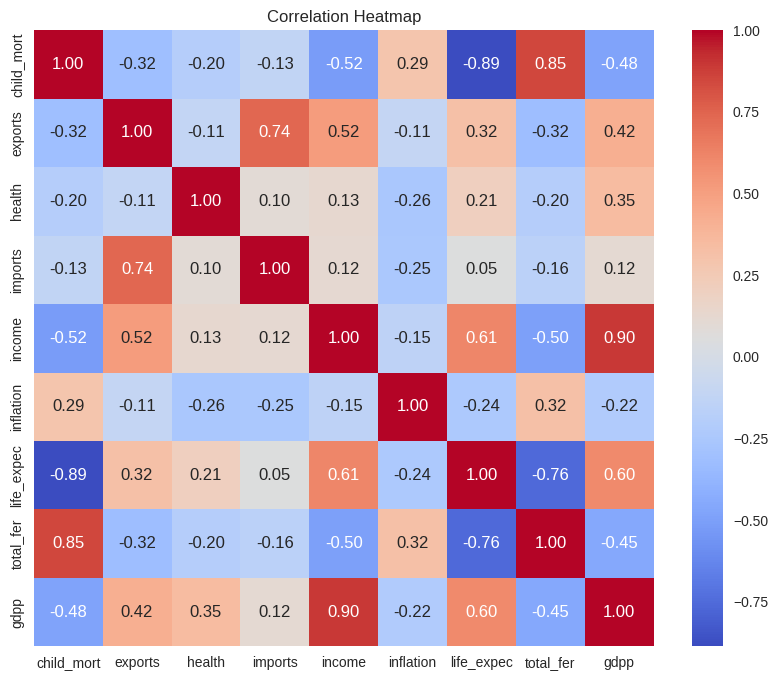

In [ ]:
# Correlation Heatmap
correlation_matrix = country_data.corr(numeric_only = True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# drop the country column
dataset = country_data.drop(['country'], axis =1)
dataset.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
#scaling data
scaler=StandardScaler()
scaled=scaler.fit_transform(dataset)
# we need to create a new dataframe with the column lables and the rescaled value
scaled_dataset=pd.DataFrame(scaled,columns=dataset.columns)

# print scaled dataset
scaled_dataset.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


2.5 Principal Component Analysis


Principal Component Analysis (PCA) will be used to reduce the dimensionality of the dataset and understand the main components that explain the most variance in the data. As PCA is sensitive to the magnitude of the variables, the data had to be scaled first using the Standard Scaler.

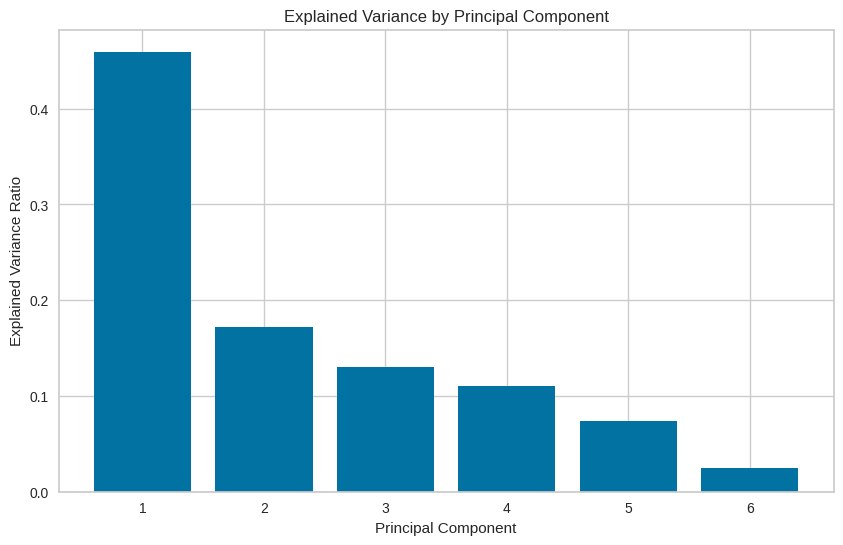

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232])

In [ ]:
# Make an instance of the Model
pca = PCA(.95)
principal_components = pca.fit_transform(scaled_dataset)

# Getting the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the explained variance for each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.title('Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
cumulative_explained_variance

# 3. Model building and evaluation

3.1 K-Means Clustering

3.1.1 Elbow method

We are going to use the elbow method to determine the number of clusters.

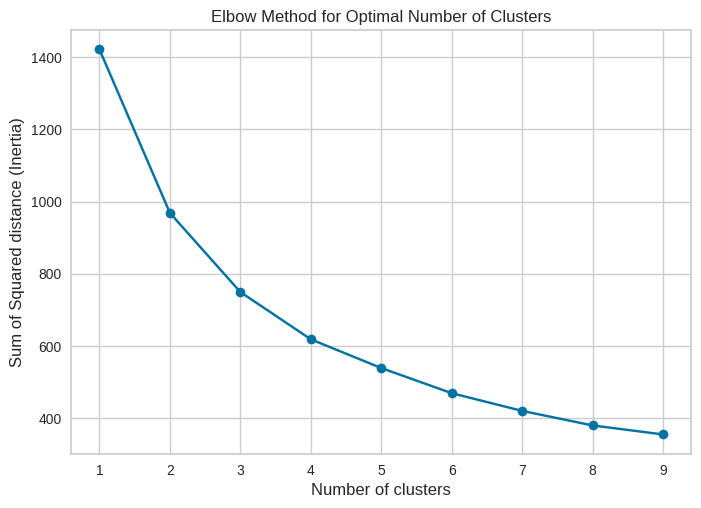

In [ ]:
# selecting the first 5 principal components
selected_components = principal_components[:, :5]

# determine the optimal number of clusters by plottng the elbow curve
inertia_values = []
for i in range(1, 10):
    kmean = KMeans(n_clusters=i, n_init=10, random_state=111)
    kmean.fit(selected_components)
    inertia_values.append(kmean.inertia_)

plt.plot(range(1, 10), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=12)
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('Sum of Squared distance (Inertia)', fontsize=12)
plt.show()


We can observe that the elbow is at 3 and as such this will be the number of clusters.

3.1.2 Train model

In [ ]:
# Refitting K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=111)
clusters = kmeans.fit_predict(selected_components)

# Adding the cluster labels to the original dataframe
country_data['K-Means Cluster'] = clusters

# Checking the mean values of features for each cluster
cluster_summary = country_data.groupby('K-Means Cluster').mean(numeric_only=True)
cluster_summary

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
K-Means Cluster,,,,,,,,,
0,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
1,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
2,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381


In [ ]:
# Count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

2    84
0    47
1    36
dtype: int64

3.1.3 Silhoutte method

We are going to use the Silhoutte method to evaluate the model.

In [ ]:
# Calculate Silhouette Coefficient for K=3

#silhouette_score(scaled_dataset, kmeans.labels_)
silhouette_score(selected_components, kmeans.labels_)

0.30797697865190166

3.1.4 Visualisation

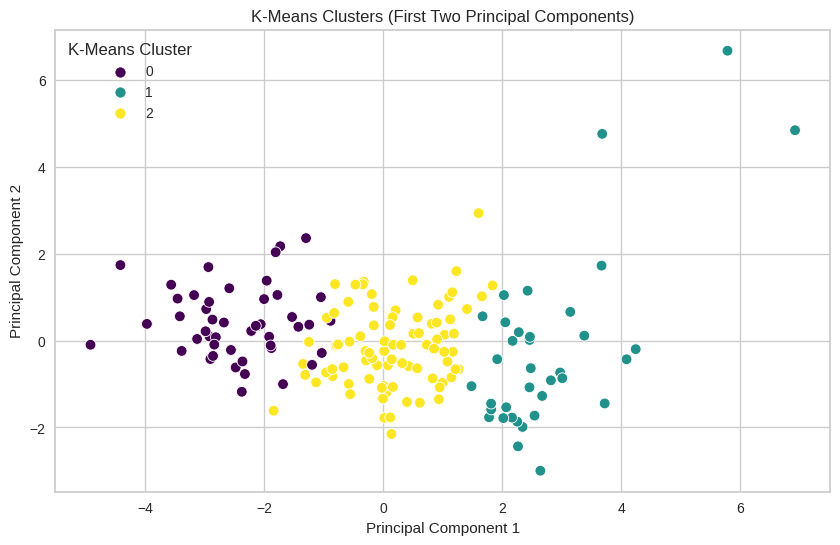

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
K-Means Cluster,,,,,,,,,
0,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
1,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
2,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381


In [ ]:
# Visualizing the clusters using the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=clusters, palette='viridis', s=60)
plt.title('K-Means Clusters (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='K-Means Cluster')
plt.show()

# Checking the mean values of features for each cluster
cluster_summary = country_data.groupby('K-Means Cluster').mean(numeric_only=True)
cluster_summary

In [ ]:
# Iterate through the clusters and print the list of countries with count
for cluster, group in country_data.groupby('K-Means Cluster'):
    countries = group['country'].tolist()
    cluster_size = len(countries)
    print(f'K-Means Cluster {cluster}: ({cluster_size} countries)')
    wrapped_countries = textwrap.fill(", ".join(countries), width=150)
    print(wrapped_countries)

K-Means Cluster 0: (47 countries)
Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote
d'Ivoire, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar,
Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, South Africa, Sudan, Tanzania, Timor-Leste,
Togo, Uganda, Yemen, Zambia
K-Means Cluster 1: (36 countries)
Australia, Austria, Bahrain, Belgium, Brunei, Canada, Cyprus, Czech Republic, Denmark, Finland, France, Germany, Greece, Iceland, Ireland, Israel,
Italy, Japan, Kuwait, Luxembourg, Malta, Netherlands, New Zealand, Norway, Portugal, Qatar, Singapore, Slovak Republic, Slovenia, South Korea, Spain,
Sweden, Switzerland, United Arab Emirates, United Kingdom, United States
K-Means Cluster 2: (84 countries)
Albania, Algeria, Antigua and Barbuda, Argentina, Armeni

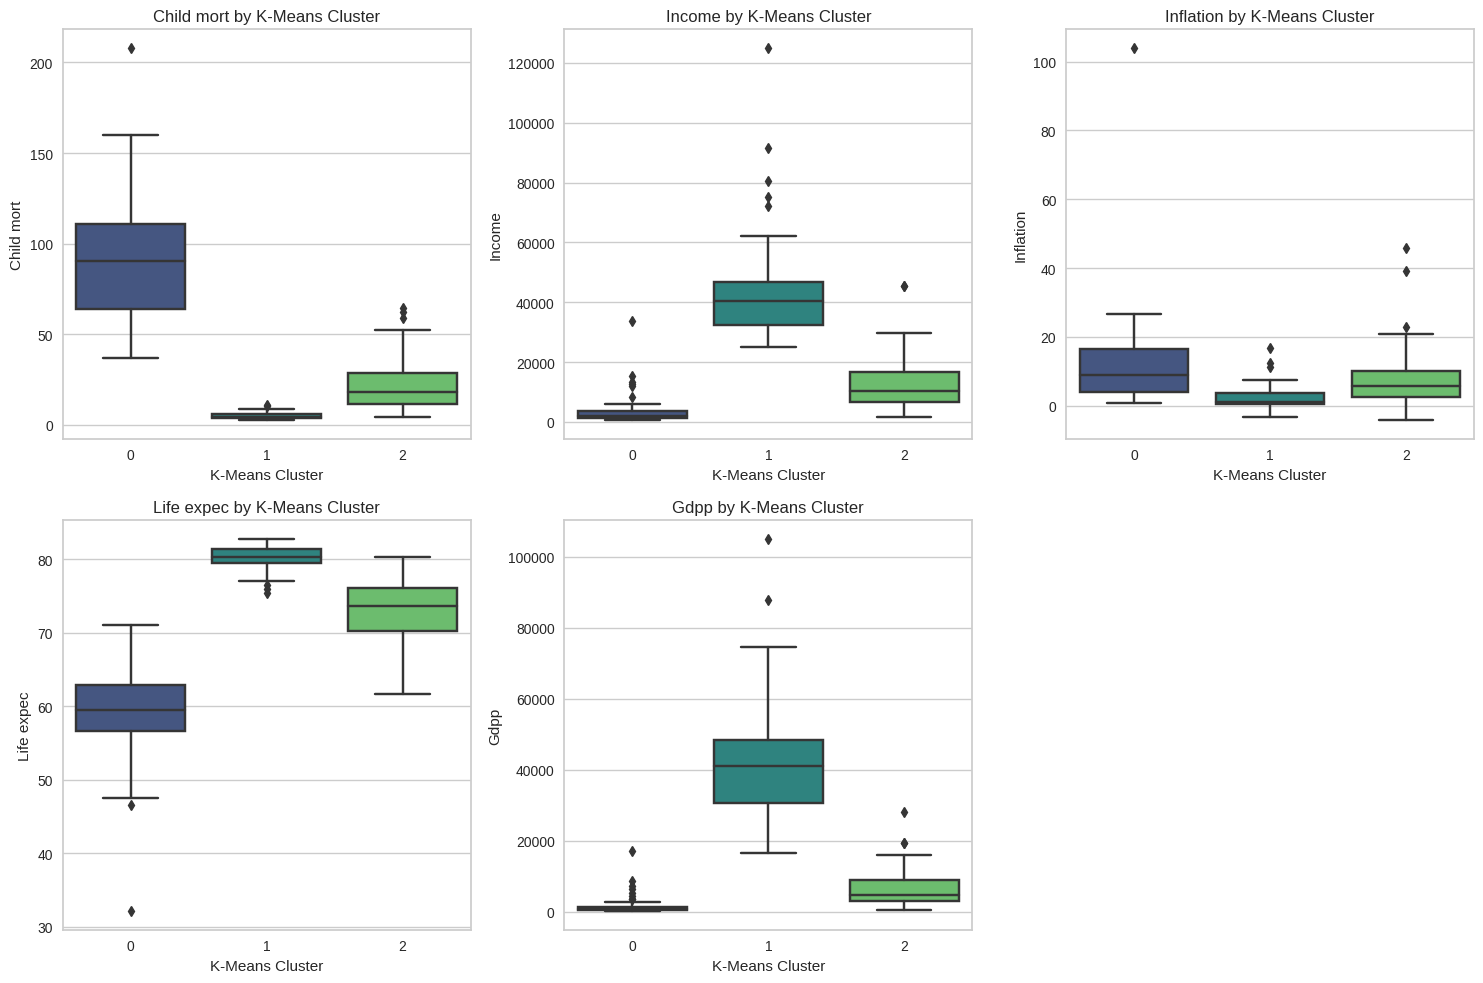

In [ ]:
# Visualizing clusters for key variables
key_variables = ['child_mort', 'income', 'inflation', 'life_expec', 'gdpp']

plt.figure(figsize=(15, 10))

for i, variable in enumerate(key_variables):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='K-Means Cluster', y=variable, data=country_data, palette='viridis')
    plt.title(f'{variable.replace("_", " ").capitalize()} by K-Means Cluster')
    plt.xlabel('K-Means Cluster')
    plt.ylabel(variable.replace("_", " ").capitalize())

plt.tight_layout()
plt.show()

3.2.1 Plot Dendogram

Dendogram is plotted to determine the number of clusters.


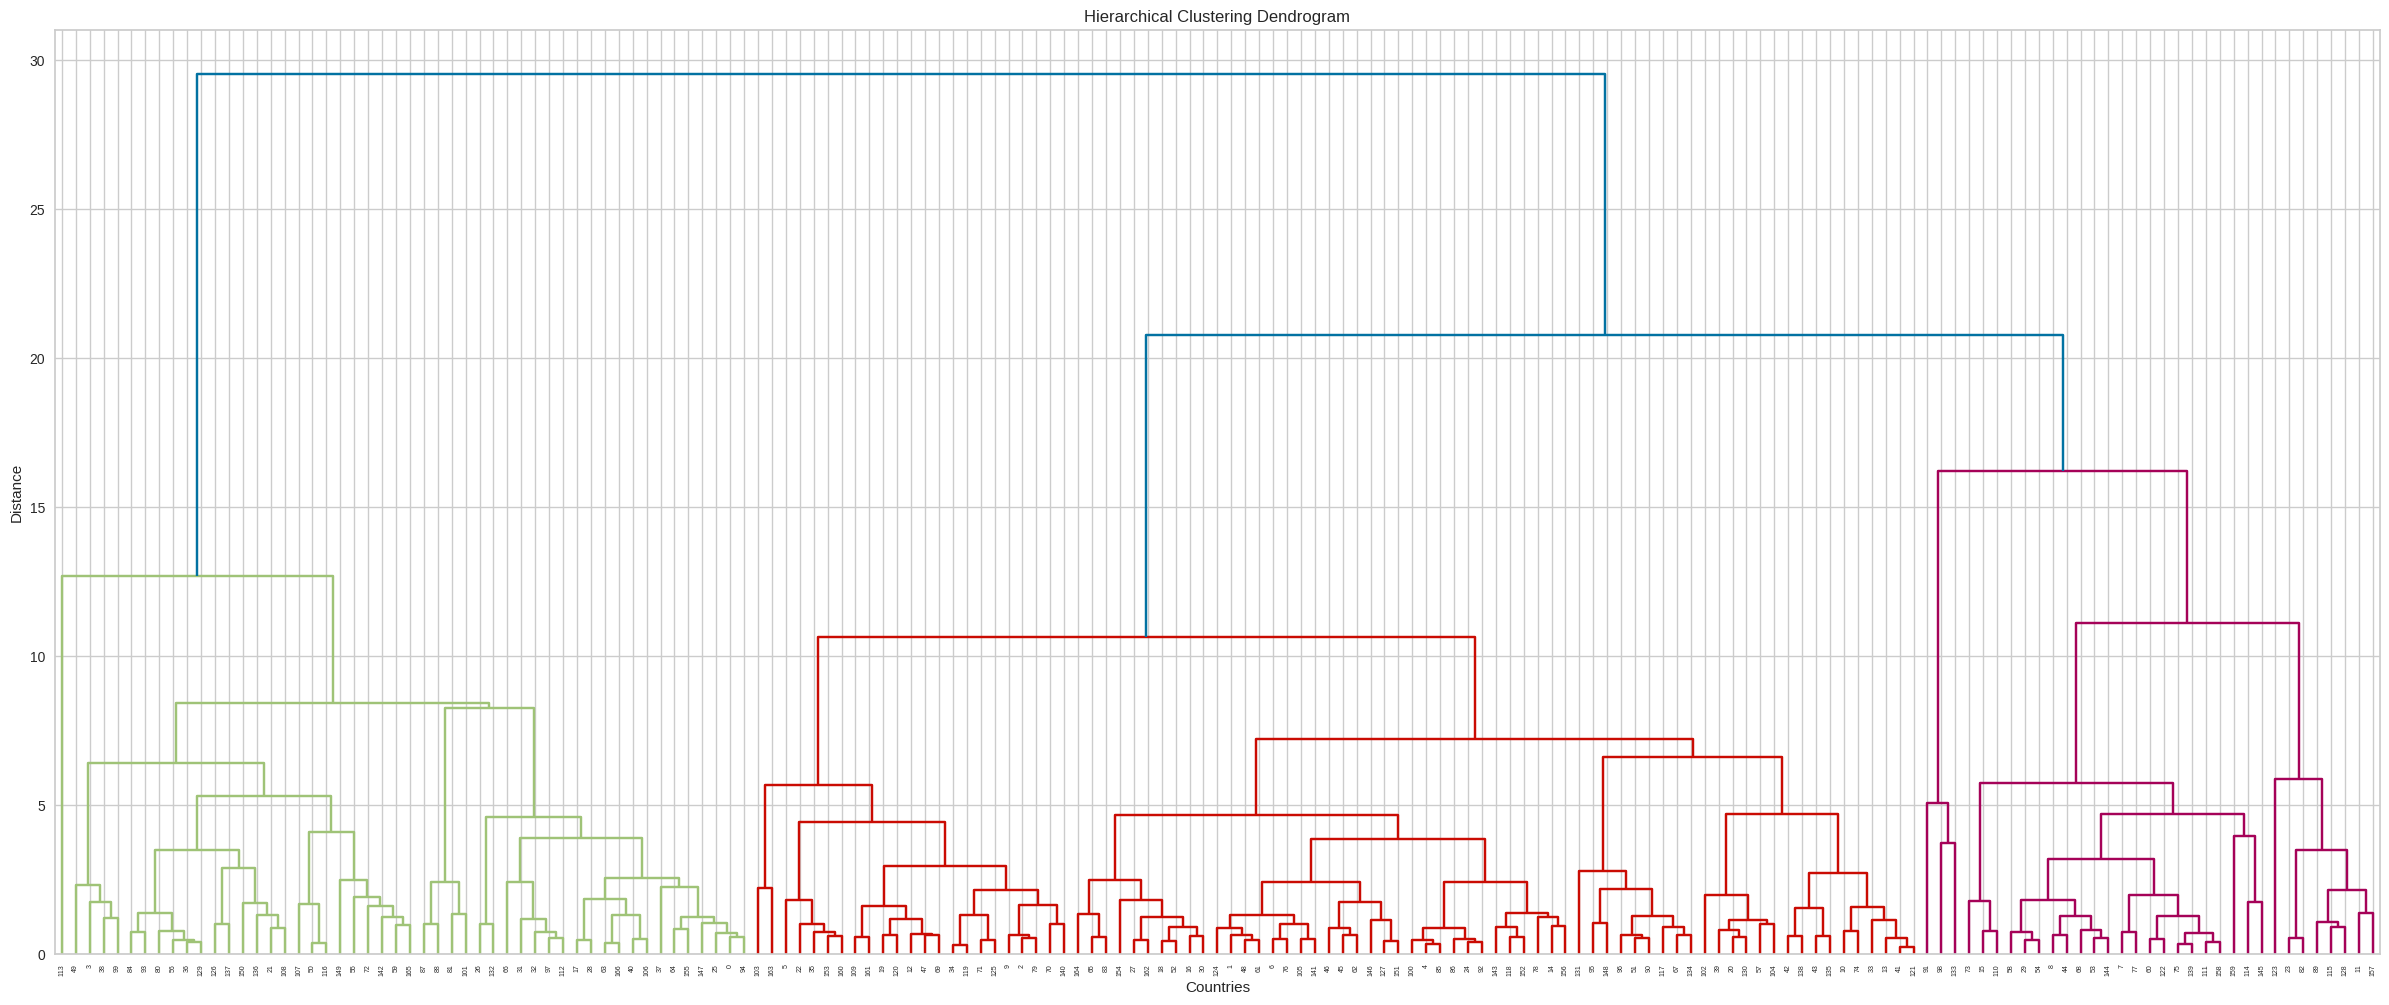

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Performing hierarchical clustering using the "ward" method
linked = linkage(selected_components, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(30, 12))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.show()

3.2.2 Train model

In [ ]:
# Applying Agglomerative Clustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean')
agg_clusters = agg_clustering.fit_predict(selected_components)

# Adding the hierarchical cluster labels to the original dataframe
country_data['Hierarchical_Cluster'] = agg_clusters

# Checking the mean values of features for each hierarchical cluster
hierarchical_cluster_summary = country_data.groupby('Hierarchical_Cluster').mean(numeric_only=True)
hierarchical_cluster_summary

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means Cluster
Hierarchical_Cluster,,,,,,,,,,
0,6.003030,59.221212,8.527576,49.387879,48133.333333,4.186576,79.939394,1.853939,43551.515152,1.090909
1,90.034000,28.860380,6.499600,43.029318,3882.660000,11.651500,59.514000,4.909800,1909.800000,0.120000
2,20.134524,41.284286,6.331310,48.207143,12864.642857,6.890881,73.441667,2.210000,7527.666667,1.928571


In [ ]:
# Count number of records in every cluster
pd.Series(agg_clustering.labels_).value_counts()

2    84
1    50
0    33
dtype: int64

3.2.3 Visualisation

In [ ]:
# Iterate through the clusters and print the list of countries with count
for cluster, group in country_data.groupby('Hierarchical_Cluster'):
    countries = group['country'].tolist()
    cluster_size = len(countries)
    print(f'Hierarchical_Cluster {cluster}: ({cluster_size} countries)')
    wrapped_countries = textwrap.fill(", ".join(countries), width=150)  # Adjust the width as needed
    print(wrapped_countries)

Hierarchical_Cluster 0: (33 countries)
Australia, Austria, Bahrain, Belgium, Brunei, Canada, Denmark, Finland, France, Germany, Greece, Iceland, Ireland, Italy, Japan, Kuwait, Libya,
Luxembourg, Malta, Netherlands, New Zealand, Norway, Oman, Portugal, Qatar, Saudi Arabia, Singapore, Spain, Sweden, Switzerland, United Arab Emirates,
United Kingdom, United States
Hierarchical_Cluster 1: (50 countries)
Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote
d'Ivoire, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar,
Malawi, Mali, Mauritania, Micronesia, Fed. Sts., Mozambique, Myanmar, Namibia, Niger, Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, Solomon
Islands, South Africa, Sudan, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia
Hierarchical_Cluster 2: (84 countries)
Albania, Algeria, Antigua and Barbuda

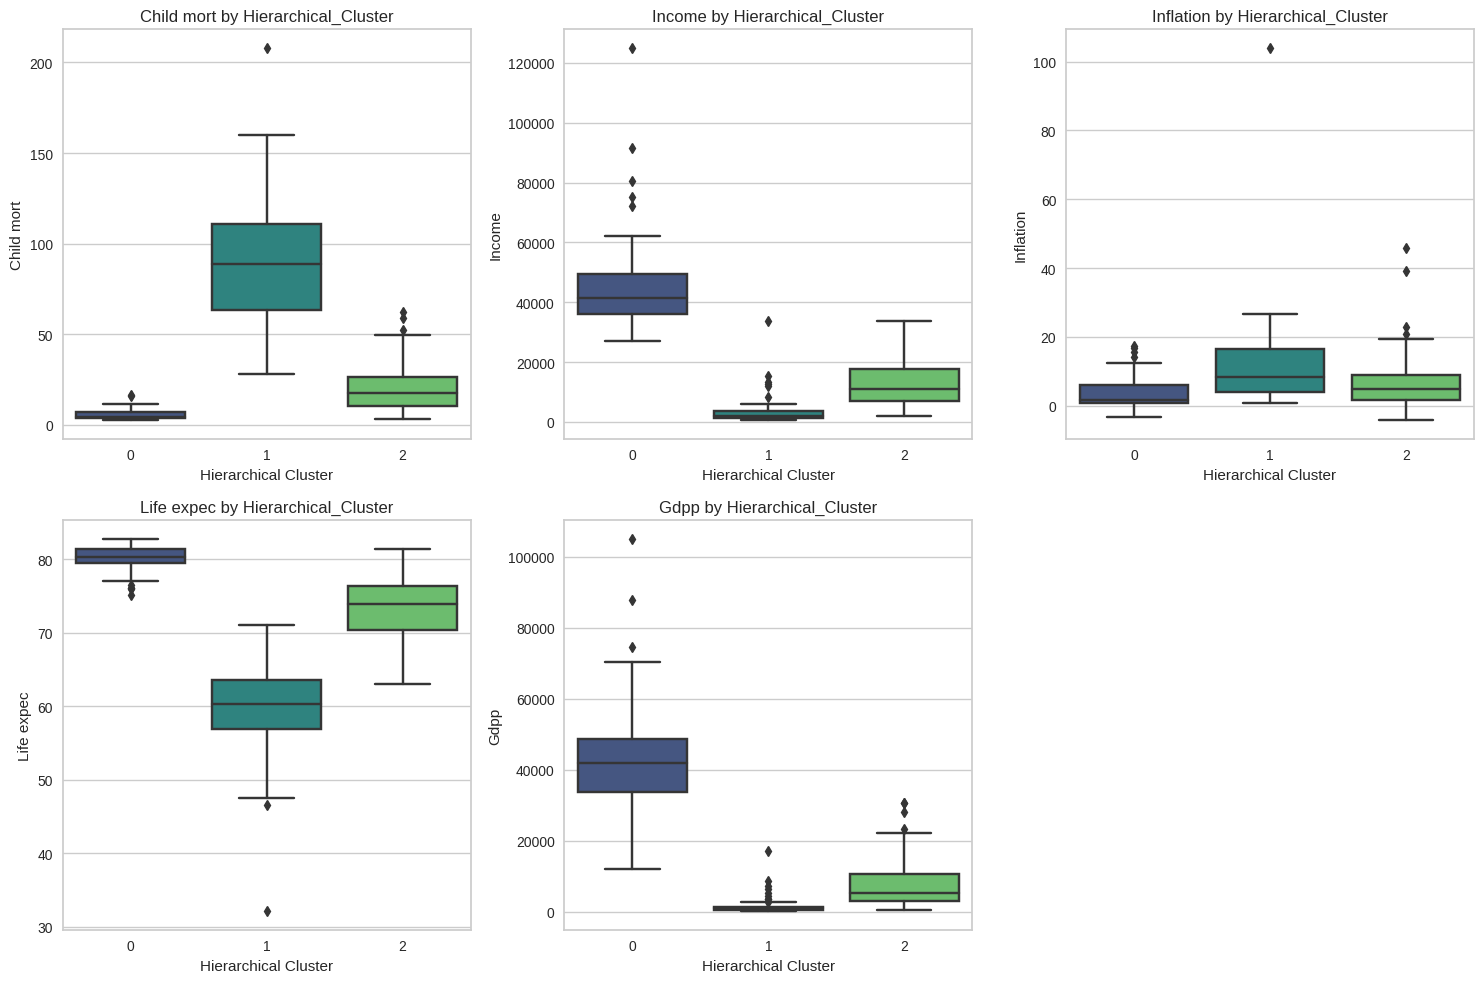

In [ ]:
# Visualizing clusters for key variables
key_variables = ['child_mort', 'income', 'inflation', 'life_expec', 'gdpp']

plt.figure(figsize=(15, 10))

for i, variable in enumerate(key_variables):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Hierarchical_Cluster', y=variable, data=country_data, palette='viridis')
    plt.title(f'{variable.replace("_", " ").capitalize()} by Hierarchical_Cluster')
    plt.xlabel('Hierarchical Cluster')
    plt.ylabel(variable.replace("_", " ").capitalize())

plt.tight_layout()
plt.show()

In [ ]:
# Cross-tabulation of K-Means and Hierarchical Clusters
cluster_comparison = pd.crosstab(country_data['K-Means Cluster'], country_data['Hierarchical_Cluster'], margins=True)
cluster_comparison.columns.name = 'Hierarchical Clustering'
cluster_comparison.index.name = 'K-Means Clustering'
cluster_comparison

Hierarchical Clustering,0,1,2,All
K-Means Clustering,,,,
0,0,47,0,47
1,30,0,6,36
2,3,3,78,84
All,33,50,84,167


In [ ]:
# Find countries in K-Means Cluster 0 but not in Hierarchical Cluster 0
kmeans_cluster_0 = country_data[country_data['K-Means Cluster'] == 0]
hierarchical_cluster_0 = country_data[country_data['Hierarchical_Cluster'] == 0]
differently_classified_by_kmeans = kmeans_cluster_0[~kmeans_cluster_0['country'].isin(hierarchical_cluster_0['country'])]

# Find countries in K-Means Cluster 1 but not in Hierarchical Cluster 1
kmeans_cluster_1 = country_data[country_data['K-Means Cluster'] == 1]
hierarchical_cluster_1 = country_data[country_data['Hierarchical_Cluster'] == 1]
differently_classified_by_kmeans = kmeans_cluster_1[~kmeans_cluster_1['country'].isin(hierarchical_cluster_1['country'])]

# Print the lists of countries differently classified by K-Means
print("Countries differently classified by K-Means in Cluster 0:")
print(differently_classified_by_kmeans['country'].tolist())

print("\nCountries differently classified by K-Means in Cluster 1:")
print(differently_classified_by_kmeans['country'].tolist())

Countries differently classified by K-Means in Cluster 0:
['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']

Countries differently classified by K-Means in Cluster 1:
['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United Stat